<a href="https://colab.research.google.com/github/Gagandeep1310/ML-Guided-Auto-Optimizer-for-Small-Programs/blob/main/KMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


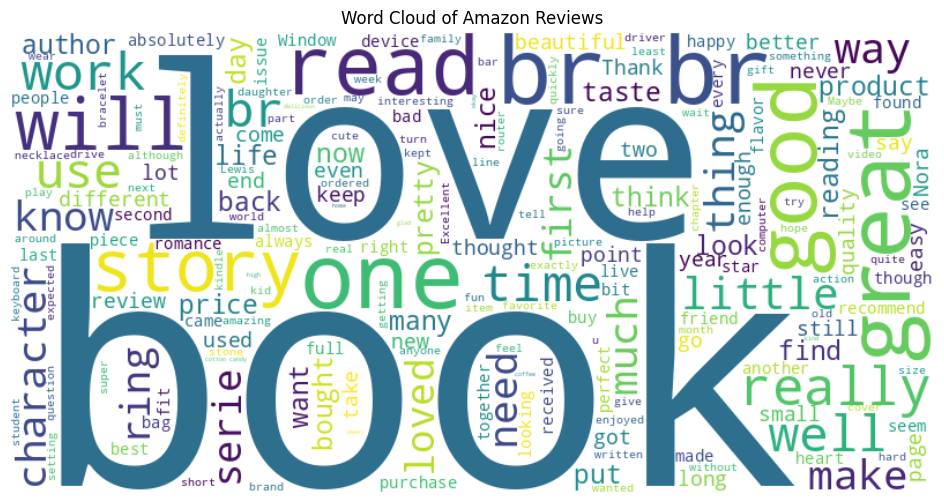

In [ ]:
# AI-Powered Market Insights Dashboard - Colab Version
# Using Kaggle Amazon Reviews dataset

# ------------------------
# Step 0: Install required packages
!pip install pandas numpy matplotlib seaborn nltk wordcloud plotly dash jupyter-dash

# ------------------------
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import glob
import re
from collections import Counter
from io import BytesIO

# For displaying in Colab
from IPython.display import display, HTML

# ------------------------
# Step 2: Download NLTK VADER lexicon
nltk.download('vader_lexicon')

# ------------------------
# Step 3: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ------------------------
# Step 4: Load dataset files
folder_path = '/content/drive/MyDrive/amazon_reviews/*.csv'  # adjust if CSVs have a different extension
files = glob.glob(folder_path)

# Read and combine all files
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# ------------------------
# Step 5: Keep only review text and rating
df = df[['review_body', 'star_rating']]
df.dropna(subset=['review_body'], inplace=True)

# ------------------------
# Step 6: Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['review_body'].apply(get_sentiment)

# ------------------------
# Step 7: Word Cloud
text_all = ' '.join(df['review_body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Amazon Reviews')
plt.show()

# ------------------------
# Step 8: Sentiment Distribution Chart
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig_sentiment = px.bar(sentiment_counts, x='Sentiment', y='Count',
                       color='Sentiment',
                       title='Sentiment Distribution of Amazon Reviews')

# ------------------------
# Step 9: Rating Distribution
rating_counts = df['star_rating'].value_counts().sort_index().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig_ratings = px.bar(rating_counts, x='Rating', y='Count',
                     title='Distribution of Star Ratings',
                     color='Rating', color_continuous_scale='Viridis')

# ------------------------
# Step 10: Top 20 Most Common Words
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

all_words = ' '.join(df['review_body'].apply(clean_text)).split()
counter = Counter(all_words)
most_common_words = counter.most_common(20)

common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
fig_words = px.bar(common_words_df, x='Word', y='Frequency',
                   title='Top 20 Most Common Words in Reviews')

# ------------------------
# Step 11: Sentiment by Rating
sentiment_by_rating = pd.crosstab(df['star_rating'], df['Sentiment'])
sentiment_by_rating_percent = sentiment_by_rating.div(sentiment_by_rating.sum(axis=1), axis=0) * 100

fig_sentiment_rating = px.imshow(sentiment_by_rating_percent,
                                 labels=dict(x="Sentiment", y="Star Rating", color="Percentage"),
                                 title="Sentiment Distribution by Star Rating",
                                 aspect="auto")
fig_sentiment_rating.update_xaxes(side="top")

# ------------------------
# Step 12: Create a simple dashboard display
display(HTML("<h1>AI-Powered Market Insights Dashboard</h1>"))
display(HTML("<h3>Amazon Product Reviews Analysis</h3>"))

# Display all visualizations
fig_sentiment.show()
fig_ratings.show()
fig_words.show()
fig_sentiment_rating.show()

# Display the top words table
display(HTML("<h3>Top 20 Most Common Words:</h3>"))
for word, freq in most_common_words:
    display(HTML(f"<p>{word}: {freq}</p>"))

# ------------------------
# Step 13: Additional Insights
# Calculate average rating by sentiment
avg_rating_by_sentiment = df.groupby('Sentiment')['star_rating'].mean().reset_index()
display(HTML("<h3>Average Star Rating by Sentiment:</h3>"))
for index, row in avg_rating_by_sentiment.iterrows():
    display(HTML(f"<p>{row['Sentiment']}: {row['star_rating']:.2f}</p>"))

# Calculate correlation between sentiment and rating
sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['sentiment_score'] = df['Sentiment'].map(sentiment_map)
correlation = df['sentiment_score'].corr(df['star_rating'])
display(HTML(f"<h3>Correlation between Sentiment and Star Rating: {correlation:.2f}</h3>"))